### Der, Die, Das

In this notebook, we will generate some useful plots for the blog post about this project.

In [47]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from der_die_das.utils import DATA_DIR, NounsDataset
from der_die_das.model import TransformerClassifier

#### 1. Distribution of genders in train and test sets of each language

In [7]:
def german_map(x):
    return {0: "der", 1: "die", 2: "das"}.get(x)

def catalan_map(x):
    return {0: "el", 1: "la"}.get(x)

def croatian_map(x):
    return {0: "masc", 1: "fem", 2: "neut"}.get(x)

# Load the datasets
german_train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
german_test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))

catalan_train = pd.read_csv(os.path.join(DATA_DIR, 'train_cat.csv'))
catalan_test = pd.read_csv(os.path.join(DATA_DIR, 'test_cat.csv'))

croatian_train = pd.read_csv(os.path.join(DATA_DIR, 'train_cro.csv'))
croatian_test = pd.read_csv(os.path.join(DATA_DIR, 'test_cro.csv'))

assert german_train.shape == catalan_train.shape == croatian_train.shape
assert german_test.shape == catalan_test.shape == croatian_test.shape

German: masculine 602, feminine 565, neuter 333
Croatian: masculine 720, feminine 584, neuter 196


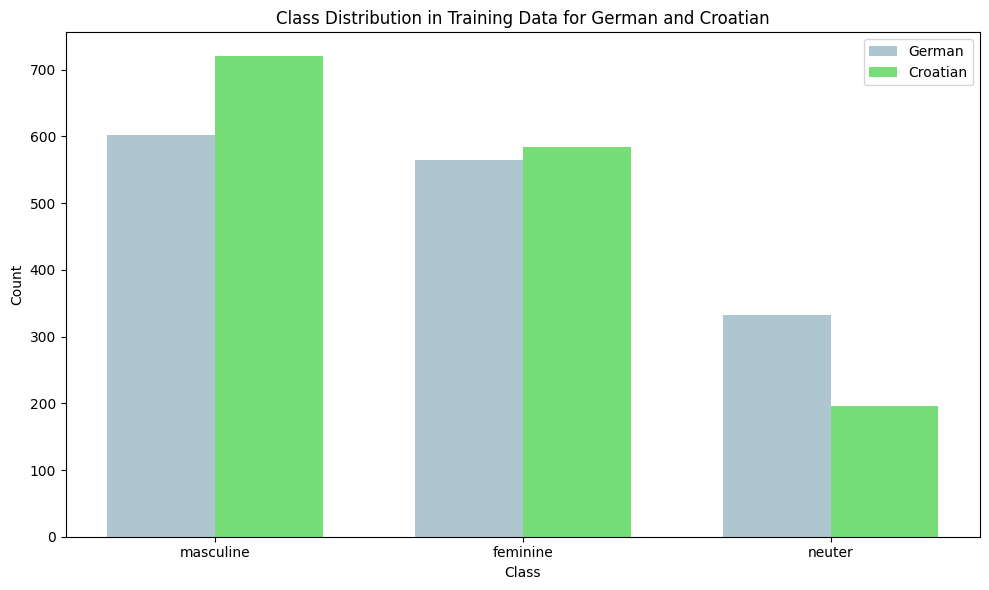

Catalan: masculine 845 (56.33%), feminine 655 (43.67%)


In [50]:
# Count the class distribution for German and Croatian
german_class_counts = german_train['y'].value_counts().sort_index()
croatian_class_counts = croatian_train['y'].value_counts().sort_index()

print(f"German: masculine {german_class_counts[0]}, feminine {german_class_counts[1]}, neuter {german_class_counts[2]}")
print(f"Croatian: masculine {croatian_class_counts[0]}, feminine {croatian_class_counts[1]}, neuter {croatian_class_counts[2]}")

# Plot the distributions
labels = ["masculine", "feminine", "neuter"]
x = range(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
ax.bar(x, german_class_counts, width=bar_width, label='German', color='#AEC6CF')
ax.bar([p + bar_width for p in x], croatian_class_counts, width=bar_width, label='Croatian', color='#77DD77')

ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Distribution in Training Data for German and Croatian')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


# Count the class distribution for Catalan
catalan_class_counts = catalan_train['y'].value_counts().sort_index()
catalan_class_counts["percentage"] = catalan_class_counts / catalan_class_counts.sum() * 100

print(f"Catalan: masculine {catalan_class_counts[0]} ({catalan_class_counts['percentage'][0]:.2f}%), feminine {catalan_class_counts[1]} ({catalan_class_counts['percentage'][1]:.2f}%)")

#### 2. Distribution of length of words

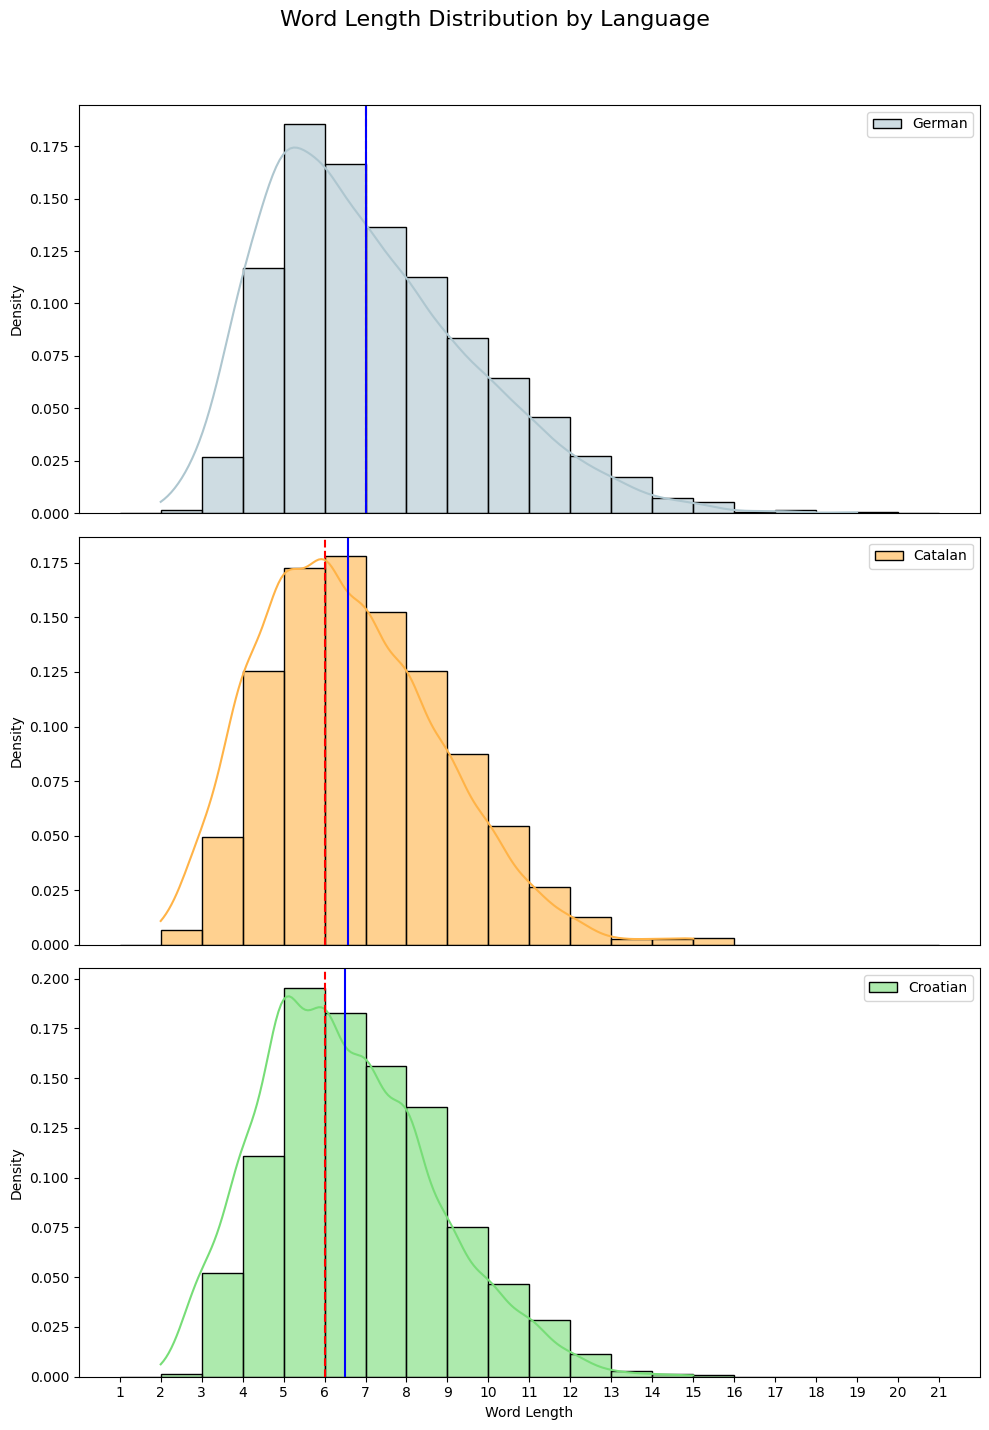

In [33]:
# Calculate the length of the words in the "x" variable
german_train['word_length'] = german_train['x'].apply(len)
catalan_train['word_length'] = catalan_train['x'].apply(len)
croatian_train['word_length'] = croatian_train['x'].apply(len)

# Calculate median and average for each language
def get_stats(df):
    return {
        'median': df['word_length'].median(),
        'average': df['word_length'].mean()
    }

german_stats = get_stats(german_train)
catalan_stats = get_stats(catalan_train)
croatian_stats = get_stats(croatian_train)

# Plot the distributions
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Define the number of bins and bin edges
num_bins = 20
bin_edges = list(range(1, 22))

# German word length distribution
sns.histplot(german_train['word_length'], bins=bin_edges, kde=True, color='#AEC6CF', label='German', stat="density", common_norm=False, alpha=0.6, ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].set_xticks([])
# Add median and average lines
axes[0].axvline(german_stats['median'], color='r', linestyle='--', label=f'Median: {german_stats["median"]:.2f}')
axes[0].axvline(german_stats['average'], color='b', linestyle='-', label=f'Average: {german_stats["average"]:.2f}')

# Catalan word length distribution
sns.histplot(catalan_train['word_length'], bins=bin_edges, kde=True, color='#FFB347', label='Catalan', stat="density", common_norm=False, alpha=0.6, ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].set_xticks([])
# Add median and average lines
axes[1].axvline(catalan_stats['median'], color='r', linestyle='--', label=f'Median: {catalan_stats["median"]:.2f}')
axes[1].axvline(catalan_stats['average'], color='b', linestyle='-', label=f'Average: {catalan_stats["average"]:.2f}')

# Croatian word length distribution
sns.histplot(croatian_train['word_length'], bins=bin_edges, kde=True, color='#77DD77', label='Croatian', stat="density", common_norm=False, alpha=0.6, ax=axes[2])
axes[2].set_xlabel('Word Length')
axes[2].set_ylabel('Density')
axes[2].legend()
axes[2].set_xticks(bin_edges)
# Add median and average lines
axes[2].axvline(croatian_stats['median'], color='r', linestyle='--', label=f'Median: {croatian_stats["median"]:.2f}')
axes[2].axvline(croatian_stats['average'], color='b', linestyle='-', label=f'Average: {croatian_stats["average"]:.2f}')

# Add general title
fig.suptitle('Word Length Distribution by Language', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to fit the title
plt.show()

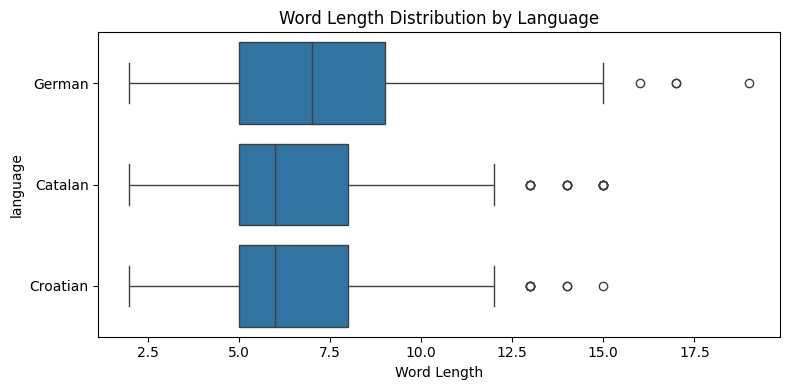

In [43]:
# Now let's do the same but just using three vertical boxplots, one for each language

fig, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(x='word_length', y='language', data=pd.concat([german_train.assign(language='German'), catalan_train.assign(language='Catalan'), croatian_train.assign(language='Croatian')]), ax=ax)
ax.set_title('Word Length Distribution by Language')
ax.set_xlabel('Word Length')

plt.tight_layout()
plt.show()

#### 3. Something else